In [110]:
from keras.models import load_model
import numpy as np, csv, matplotlib.pyplot as plt, random
from keras import backend as K

WORDS_COUNT = 113385
EPOCHS = 3

In [111]:
model = load_model('{0} [{1}].hd5'.format(WORDS_COUNT, EPOCHS))

In [112]:
def get_vectors(kfunc, getting):
    print("Getting {0} from file".format(getting))
    items = {}
    ids = []
    with open("{0}.{1}.csv".format(str(WORDS_COUNT), getting)) as fd:
        reader = csv.reader(fd)
        for i, w in reader:
            items[i] = w
            ids.append([i])
    ids = np.asarray(ids)
    print("Done!")
    print("Getting vectors")
    temp = kfunc([ids])[0]
    for i, v in zip(ids, temp):
        i, v = i[0], (v[0] if getting == 'words' else v)
        items[i] = (items[i], v)
    print("Done!")
    return items


def get_words_vectors():
    kfunc = K.function(
        [model.layers[1].input],
        [model.layers[3].get_output_at(0)]
    )

    return get_vectors(kfunc, 'words')

def get_rels_vectors():
    kfunc = K.function(
        [model.layers[0].input],
        [model.layers[4].output]
    )
    
    return get_vectors(kfunc, 'rels')

from math import sqrt
def distance(v1, v2):
    acum=0
    for x,y in zip(v1,v2):
        acum+= (x-y)**2
    return sqrt(acum)

In [113]:
words_vectors = get_words_vectors()

Getting words from file
Done!
Getting vectors
Done!


In [114]:
data = np.genfromtxt(str(WORDS_COUNT) + '.set', dtype=('<U2'))

In [115]:
STEP=.25
dist_w = np.asarray([0]*int(4/STEP))
dist_n = np.asarray([0]*int(4/STEP))
for w1,r,w2,v in data:#[d for d in data if d[1] == "0"]:
    d = distance(words_vectors[w1][1], words_vectors[w2][1])
    dest = dist_w if v == "1" else dist_n
    dest[int(d/STEP)]+=1


In [116]:
DEG=8
X = np.arange(0.5,4.5,STEP)
pol_w = np.polyfit(X, dist_w, DEG)
pol_n = np.polyfit(X, dist_n, DEG)

W1 = np.polyval(pol_w, X)
N1 = np.polyval(pol_n, X)


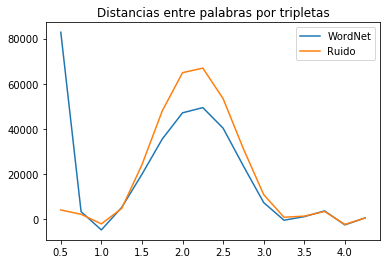

In [117]:
plt.plot(X, W1, label='WordNet')
plt.plot(X, N1, label='Ruido')
plt.title("Distancias entre palabras por tripletas")
plt.legend()
plt.savefig('distances-syn.png')